In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

# To remove warnings related to type change
pd.options.mode.chained_assignment = None  

import warnings
warnings.filterwarnings('ignore')

# Training data 
df = pd.read_csv("training_data/H2HBABBA2513.csv")

# no of elements in model
print("total no of elemets - ",df.shape)

total no of elemets -  (50000, 19)


In [2]:
# A new dataset for null values in clear_date is created for deplyoyment test
test_set_df = df[df['clear_date'].isnull()]
adf = df[df['clear_date'].isnull()]
# removed deplyoyment test values from main dataframe
df = df[df['clear_date'].isnull() == False ]
df.shape, test_set_df.shape

((40000, 19), (10000, 19))

In [3]:
# now we will check empty fields
df.isnull().sum() == df.shape[0] 

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
document type             False
posting_id                False
area_business              True
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                False
isOpen                    False
dtype: bool

In [4]:
# As area_business is null we will remove that coll
df.drop(['area_business'], axis=True, inplace = True)

In [5]:
df.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                5
isOpen                    0
dtype: int64

In [6]:
# Invoice id has 5 null values
df[df.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
625,CA02,0100030194,AMAZO llc,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190305,20190315.0,CAD,X2,1.0,266.40,20190305.0,CA10,NaN,0
4249,CA02,0140104409,LOB associates,2019-04-17 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190314,20190324.0,CAD,X2,1.0,698.60,20190314.0,CA10,NaN,0
6044,CA02,0140106054,TREE us,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190306,20190316.0,CAD,X2,1.0,1570.59,20190306.0,CA10,NaN,0
26695,CA02,0140106054,TREE in,2019-06-17 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190325,20190404.0,CAD,X2,1.0,14247.00,20190325.0,CA10,NaN,0
42880,CA02,0140104429,COSTCO associates,2019-05-14 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190311,20190321.0,CAD,X2,1.0,5353.20,20190311.0,CA10,NaN,0


In [7]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200148860,DOLLA corporation,2019-02-20 00:00:00,2019.0,1.928742e+09,2019-02-05,20190205,20190205,20190411.0,USD,RV,1.0,9380.15,20190205.0,NAGD,1.928742e+09,0
1,U001,0200759878,SA trust,2019-11-20 00:00:00,2019.0,1.929983e+09,2019-10-10,20191008,20191010,20191119.0,USD,RV,1.0,723.80,20191010.0,NAWU,1.929983e+09,0
2,U001,0200770567,LABAT,2019-04-03 00:00:00,2019.0,1.928954e+09,2019-03-14,20190312,20190314,20190329.0,USD,RV,1.0,748.50,20190314.0,NAA8,1.928954e+09,0
3,U001,0200739006,AL foundation,2019-11-22 00:00:00,2019.0,1.930119e+09,2019-11-08,20191106,20191108,20191123.0,USD,RV,1.0,21300.00,20191108.0,NAA8,1.930119e+09,0
4,U001,0200782001,GORDO co,2019-06-04 00:00:00,2019.0,1.929336e+09,2019-05-22,20190517,20190522,20190606.0,USD,RV,1.0,57526.76,20190522.0,NAA8,1.929336e+09,0


In [8]:
# From avove observation it seems like doc_id is same as invoice_id so we will check it by corr
df['doc_id'].corr(df['invoice_id'])

1.0

In [9]:
# It gave value 1.0 that mean both coll are exact same so we can just drop one 
df.drop(['invoice_id'], axis=True, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           40000 non-null  object 
 1   cust_number             40000 non-null  object 
 2   name_customer           40000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           40000 non-null  float64
 5   doc_id                  40000 non-null  float64
 6   posting_date            40000 non-null  object 
 7   document_create_date    40000 non-null  int64  
 8   document_create_date.1  40000 non-null  int64  
 9   due_in_date             40000 non-null  float64
 10  invoice_currency        40000 non-null  object 
 11  document type           40000 non-null  object 
 12  posting_id              40000 non-null  float64
 13  total_open_amount       40000 non-null  float64
 14  baseline_create_date    40000 non-null

In [11]:
df.nunique()

business_code                 6
cust_number                1363
name_customer              3884
clear_date                  396
buisness_year                 2
doc_id                    39145
posting_date                423
document_create_date        428
document_create_date.1      423
due_in_date                 487
invoice_currency              2
document type                 2
posting_id                    1
total_open_amount         35500
baseline_create_date        429
cust_payment_terms           70
isOpen                        1
dtype: int64

In [12]:
# Conversion of data in known format 

df["baseline_create_date"] = df["baseline_create_date"].astype(int)
df["due_in_date"] = df["due_in_date"].astype(int)
df["posting_id"] = df["posting_id"].astype(np.int64)
df["buisness_year"] = df["buisness_year"].astype(np.int64)
df['doc_id'] = df['doc_id'].fillna(0).astype(np.int64)

# converting dates in date-time format 
import datetime
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['clear_date'] = pd.to_datetime(df['clear_date'])
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format='%Y%m%d')
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format='%Y%m%d')
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format='%Y%m%d')


df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
document_create_date      datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                         int64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
isOpen                             int64
dtype: object

In [13]:
# sort data acc to posting_date 
df.sort_values(by=['posting_date'], inplace=True)

df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
20867,U001,0200769623,WAL-MAR corp,2019-01-09,2019,1928534691,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1,1568.64,2018-12-30,NAH4,0
46293,U001,0200705742,DOT foundation,2019-01-15,2019,1928540726,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1,13299.43,2018-12-30,NAA8,0
36314,U001,0200769623,WAL-MAR foundation,2019-01-10,2019,1928542619,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1,27642.47,2018-12-30,NAH4,0
45042,U001,0200769623,WAL-MAR in,2019-01-09,2019,1928541268,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,1,45753.04,2018-12-30,NAH4,0
14546,U001,0200769623,WAL-MAR corporation,2019-01-15,2019,1928540722,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,1,7634.03,2018-12-30,NAH4,0


In [14]:
# we will create col in which duration from due_in_date and respected document dates are made 
df['posting_date_delay'] = (df['due_in_date'] -  df['posting_date'])
df['document_create_date_delay'] = (df['due_in_date'] -  df['document_create_date'])
df['document_create_date_delay.1'] = (df['due_in_date'] -  df['document_create_date.1'])
df['baseline_create_date_delay'] = (df['due_in_date'] -  df['baseline_create_date'])

# Convert target from days format to known format(ML)
df['posting_date_delay'] = (df['posting_date_delay']).dt.days
df['document_create_date_delay'] = (df['document_create_date_delay']).dt.days
df['document_create_date_delay.1'] = (df['document_create_date_delay.1']).dt.days
df['baseline_create_date_delay'] = (df['baseline_create_date_delay']).dt.days

# we can now remove posting_date col now 
df.drop(['posting_date','document_create_date','document_create_date.1','baseline_create_date'], axis=True, inplace = True)

In [15]:
# Create target col for target values -> clear_date - due_in_date
df['Target'] = (df['clear_date'] - df['due_in_date'])

# Convert target from days format to known format(ML)
df['Target'] = (df['Target']).dt.days

# Droping clear date as it's like a target value and we dont want to give our training data 
df.drop(['clear_date'], axis=True, inplace = True)

df.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,due_in_date,invoice_currency,document type,posting_id,total_open_amount,cust_payment_terms,isOpen,posting_date_delay,document_create_date_delay,document_create_date_delay.1,baseline_create_date_delay,Target
20867,U001,0200769623,WAL-MAR corp,2019,1928534691,2019-01-14,USD,RV,1,1568.64,NAH4,0,15,16,15,15,-5
46293,U001,0200705742,DOT foundation,2019,1928540726,2019-01-14,USD,RV,1,13299.43,NAA8,0,15,16,15,15,1
36314,U001,0200769623,WAL-MAR foundation,2019,1928542619,2019-01-14,USD,RV,1,27642.47,NAH4,0,15,15,15,15,-4
45042,U001,0200769623,WAL-MAR in,2019,1928541268,2019-01-14,USD,RV,1,45753.04,NAH4,0,15,15,15,15,-5
14546,U001,0200769623,WAL-MAR corporation,2019,1928540722,2019-01-14,USD,RV,1,7634.03,NAH4,0,15,16,15,15,1


In [16]:
df.nunique()

business_code                       6
cust_number                      1363
name_customer                    3884
buisness_year                       2
doc_id                          39145
due_in_date                       487
invoice_currency                    2
document type                       2
posting_id                          1
total_open_amount               35500
cust_payment_terms                 70
isOpen                              1
posting_date_delay                 72
document_create_date_delay        115
document_create_date_delay.1       70
baseline_create_date_delay         31
Target                            185
dtype: int64

In [17]:
# Now we will apply target encoding on cust_payment_terms, cust_number

from category_encoders import TargetEncoder
cust_payment_terms_encoder = TargetEncoder()
cust_payment_terms_encoder.fit(df['cust_payment_terms'], df['Target'])

df['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(df['cust_payment_terms'])


df['cust_payment_terms_enc']

# Now we will remove cust_payment_terms as its not needed anymore 
df.drop(['cust_payment_terms'], axis = True, inplace = True)


# cust_number
cust_number_encoder = TargetEncoder()
cust_number_encoder.fit(df['cust_number'], df['Target'])

df['cust_number_enc'] = cust_number_encoder.transform(df['cust_number'])


df['cust_number_enc']

# Now we will remove cust_number as its not needed anymore 
df.drop(['cust_number'], axis = True, inplace = True)

df.head()

,business_code,name_customer,buisness_year,doc_id,due_in_date,invoice_currency,document type,posting_id,total_open_amount,isOpen,posting_date_delay,document_create_date_delay,document_create_date_delay.1,baseline_create_date_delay,Target,cust_payment_terms_enc,cust_number_enc
20867,U001,WAL-MAR corp,2019,1928534691,2019-01-14,USD,RV,1,1568.64,0,15,16,15,15,-5,-1.872720,-2.218694
46293,U001,DOT foundation,2019,1928540726,2019-01-14,USD,RV,1,13299.43,0,15,16,15,15,1,1.342768,-6.855573
36314,U001,WAL-MAR foundation,2019,1928542619,2019-01-14,USD,RV,1,27642.47,0,15,15,15,15,-4,-1.872720,-2.218694
45042,U001,WAL-MAR in,2019,1928541268,2019-01-14,USD,RV,1,45753.04,0,15,15,15,15,-5,-1.872720,-2.218694
14546,U001,WAL-MAR corporation,2019,1928540722,2019-01-14,USD,RV,1,7634.03,0,15,16,15,15,1,-1.872720,-2.218694


In [18]:
df.dtypes


business_code                           object
name_customer                           object
buisness_year                            int64
doc_id                                   int64
due_in_date                     datetime64[ns]
invoice_currency                        object
document type                           object
posting_id                               int64
total_open_amount                      float64
isOpen                                   int64
posting_date_delay                       int64
document_create_date_delay               int64
document_create_date_delay.1             int64
baseline_create_date_delay               int64
Target                                   int64
cust_payment_terms_enc                 float64
cust_number_enc                        float64
dtype: object

In [19]:
# now we will split due_in_date dates in there known format 


df['due_in_date_year'] = df['due_in_date'].dt.year
df['due_in_date_month'] = df['due_in_date'].dt.month
df['due_in_date_day'] = df['due_in_date'].dt.day

# as all dates have been converted we will delete unrequired col
df.drop(['due_in_date'], axis=True, inplace = True)
df.dtypes

business_code                    object
name_customer                    object
buisness_year                     int64
doc_id                            int64
invoice_currency                 object
document type                    object
posting_id                        int64
total_open_amount               float64
isOpen                            int64
posting_date_delay                int64
document_create_date_delay        int64
document_create_date_delay.1      int64
baseline_create_date_delay        int64
Target                            int64
cust_payment_terms_enc          float64
cust_number_enc                 float64
due_in_date_year                  int64
due_in_date_month                 int64
due_in_date_day                   int64
dtype: object

In [20]:
df.apply(pd.Series.nunique)

business_code                       6
name_customer                    3884
buisness_year                       2
doc_id                          39145
invoice_currency                    2
document type                       2
posting_id                          1
total_open_amount               35500
isOpen                              1
posting_date_delay                 72
document_create_date_delay        115
document_create_date_delay.1       70
baseline_create_date_delay         31
Target                            185
cust_payment_terms_enc             59
cust_number_enc                   651
due_in_date_year                    3
due_in_date_month                  12
due_in_date_day                    31
dtype: int64

In [21]:
# We will delete unique value col 
df.drop(['isOpen','posting_id'], axis=True, inplace = True)

In [22]:
from sklearn.model_selection import train_test_split

# now we will split data 
X = df.drop(['Target'], axis = 1)
y = df['Target']

X_train, X_itest, y_train, y_itest  = train_test_split(X,y,test_size = 0.3, random_state = 0 , shuffle = False)

X_train.shape, X_itest.shape , df.shape

((28000, 16), (12000, 16), (40000, 17))

In [23]:
# now we will split itest data in 2 diff dataSets validation and test

X_val, X_test, y_val, y_test  = train_test_split(X_itest,y_itest,test_size = 0.3, random_state = 0 , shuffle = False)

X_val.shape , X_test.shape, X_itest.shape 

((8400, 16), (3600, 16), (12000, 16))

<AxesSubplot:xlabel='Target', ylabel='Density'>

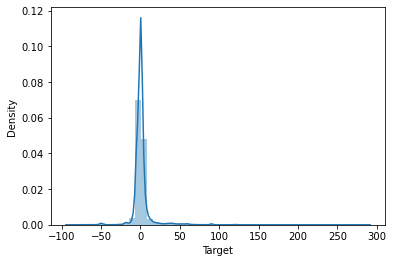

In [24]:
# plot of target values to find wether it had outliers or not
sns.distplot(y_train)


<AxesSubplot:xlabel='Target'>

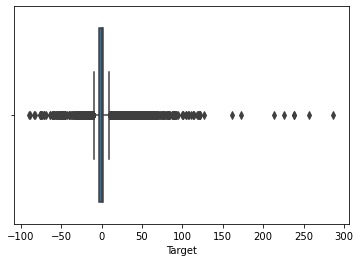

In [25]:
sns.boxplot(y_train)

In [26]:
# acc to boxplot we can say that it is right skew
# Now we need to remove outliers present in this data 
data=X_train.merge(y_train,on = X_train.index)
data.Target.describe()

count    28000.000000
mean         1.167250
std         12.058857
min        -90.000000
25%         -3.000000
50%          0.000000
75%          2.000000
max        287.000000
Name: Target, dtype: float64

In [27]:
Q1 = data.Target.quantile(0.25)
Q3 = data.Target.quantile(0.75)

Q1, Q3

(-3.0, 2.0)

In [28]:
iqr = Q3-Q1
iqr

5.0

In [29]:
lower_limit = Q1 - 1.5*iqr
upper_limit = Q3 + 1.5*iqr
lower_limit, upper_limit
data

,key_0,business_code,name_customer,buisness_year,doc_id,invoice_currency,document type,total_open_amount,posting_date_delay,document_create_date_delay,document_create_date_delay.1,baseline_create_date_delay,cust_payment_terms_enc,cust_number_enc,due_in_date_year,due_in_date_month,due_in_date_day,Target
0,20867,U001,WAL-MAR corp,2019,1928534691,USD,RV,1568.64,15,16,15,15,-1.872720,-2.218694,2019,1,14,-5
1,46293,U001,DOT foundation,2019,1928540726,USD,RV,13299.43,15,16,15,15,1.342768,-6.855573,2019,1,14,1
2,36314,U001,WAL-MAR foundation,2019,1928542619,USD,RV,27642.47,15,15,15,15,-1.872720,-2.218694,2019,1,14,-4
3,45042,U001,WAL-MAR in,2019,1928541268,USD,RV,45753.04,15,15,15,15,-1.872720,-2.218694,2019,1,14,-5
4,14546,U001,WAL-MAR corporation,2019,1928540722,USD,RV,7634.03,15,16,15,15,-1.872720,-2.218694,2019,1,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,40162,U001,C&S WH corporation,2019,1929968572,USD,RV,14522.31,15,15,15,15,0.511322,-0.524470,2019,10,22,0
27996,42928,U001,SMITH'S co,2019,1929974162,USD,RV,105166.27,15,15,15,15,1.342768,0.550000,2019,10,22,0
27997,25843,U001,DEC trust,2019,1929976466,USD,RV,146.64,17,17,17,23,-7.388787,-4.447368,2019,10,24,-8
27998,899,U001,MEIJ,2019,1929981487,USD,RV,54043.04,15,15,15,15,1.342768,1.567308,2019,10,22,1


In [30]:
# outliers in train data
data[(data.Target<lower_limit)|(data.Target>upper_limit)]

,key_0,business_code,name_customer,buisness_year,doc_id,invoice_currency,document type,total_open_amount,posting_date_delay,document_create_date_delay,document_create_date_delay.1,baseline_create_date_delay,cust_payment_terms_enc,cust_number_enc,due_in_date_year,due_in_date_month,due_in_date_day,Target
8,40736,U013,SYSCO IN trust,2019,1991819555,USD,RV,28225.48,30,32,30,30,-0.882353,2.923077,2019,1,29,30
17,48464,U001,KRAFT F llc,2019,1928509246,USD,RV,601.77,0,-1,0,0,43.615514,42.616838,2018,12,30,61
22,17453,U001,BEST foundation,2019,1928541603,USD,RV,625.00,30,31,30,30,7.756184,-5.764388,2019,1,29,-15
34,6541,U002,WAL MA in,2019,1990562574,USD,RV,16416.00,35,36,35,35,6.821705,7.875000,2019,2,3,11
48,22316,CA02,WAL-M foundation,2019,2960520360,CAD,RV,60289.21,10,10,10,10,6.127822,9.257541,2019,1,9,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27910,33387,U001,KRAFT F systems,2019,1929970231,USD,RV,17230.94,0,2,0,0,43.615514,42.616838,2019,10,6,52
27948,48346,U001,DOT corporation,2019,1929980661,USD,RV,12418.11,34,33,34,34,-15.225275,-6.855573,2019,11,10,-19
27975,31738,U001,DOT trust,2019,1929976741,USD,RV,29831.86,32,32,32,32,-4.203767,-6.855573,2019,11,8,-17
27980,29361,U001,H E BUT in,2019,1929976367,USD,RV,29985.25,65,65,65,65,-14.448882,-2.735099,2019,12,11,-50


In [31]:
# Now we will remove those outliers
data = data[(data.Target>lower_limit) & (data.Target<upper_limit)]

# Now we will maxe our orignal index as its main index and remove index name 
data = data.set_index('key_0')
data.rename_axis(None, inplace=True)

# Now we will split data again in target and rest of col's
X_train = data.drop(['Target'], axis = 1)
y_train = data['Target']
data.apply(pd.Series.nunique)

business_code                       5
name_customer                    3028
buisness_year                       1
doc_id                          25174
invoice_currency                    2
document type                       1
total_open_amount               23039
posting_date_delay                 52
document_create_date_delay         88
document_create_date_delay.1       52
baseline_create_date_delay         26
cust_payment_terms_enc             53
cust_number_enc                   610
due_in_date_year                    1
due_in_date_month                  12
due_in_date_day                    31
Target                             20
dtype: int64

(<AxesSubplot:xlabel='Target'>, <seaborn.axisgrid.FacetGrid at 0x258c46574f0>)

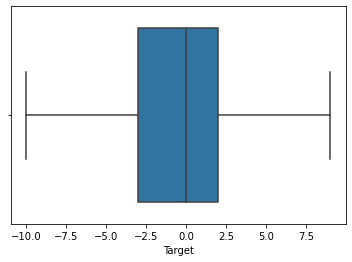

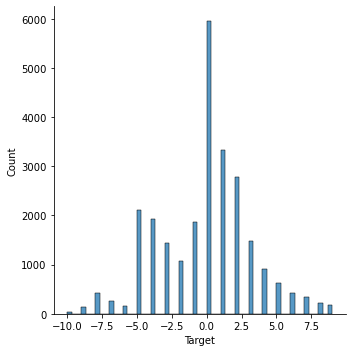

In [32]:
sns.boxplot(y_train), sns.displot(y_train)

<AxesSubplot:xlabel='Target', ylabel='document_create_date_delay'>

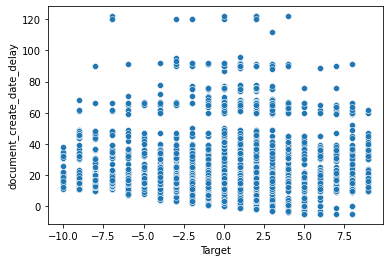

In [33]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="Target", y="document_create_date_delay")

<AxesSubplot:xlabel='Target', ylabel='cust_payment_terms_enc'>

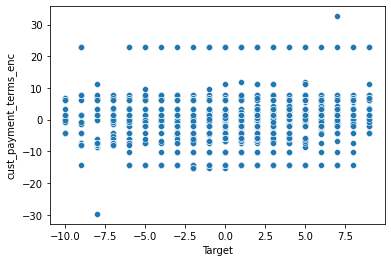

In [34]:
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="Target", y="cust_payment_terms_enc")

<AxesSubplot:xlabel='Target', ylabel='due_in_date_day'>

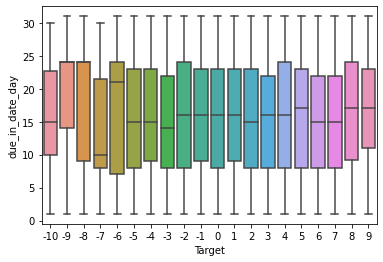

In [35]:
sns.boxplot(data=X_train.merge(y_train,on = X_train.index), x="Target", y="due_in_date_day")

In [36]:
# we will drop doc_id as its unique for all cust and hold no value in predictions

X_train.drop(['doc_id'], axis =1,inplace=True)
X_val.drop(['doc_id'],axis=1 , inplace=True)
X_test.drop(['doc_id'],axis=1 , inplace=True)

In [37]:
df.dtypes

business_code                    object
name_customer                    object
buisness_year                     int64
doc_id                            int64
invoice_currency                 object
document type                    object
total_open_amount               float64
posting_date_delay                int64
document_create_date_delay        int64
document_create_date_delay.1      int64
baseline_create_date_delay        int64
Target                            int64
cust_payment_terms_enc          float64
cust_number_enc                 float64
due_in_date_year                  int64
due_in_date_month                 int64
due_in_date_day                   int64
dtype: object

In [38]:
df.nunique()

business_code                       6
name_customer                    3884
buisness_year                       2
doc_id                          39145
invoice_currency                    2
document type                       2
total_open_amount               35500
posting_date_delay                 72
document_create_date_delay        115
document_create_date_delay.1       70
baseline_create_date_delay         31
Target                            185
cust_payment_terms_enc             59
cust_number_enc                   651
due_in_date_year                    3
due_in_date_month                  12
due_in_date_day                    31
dtype: int64

In [39]:
# now We will convert total_open_amount to USD 
# then store it in a col named as total_open_amount_usd
# 1 CAD = .81 USD

X_train['total_open_amount_usd'] = np.where(X_train.invoice_currency == 'CAD', X_train.total_open_amount*0.81, X_train.total_open_amount)
X_val['total_open_amount_usd'] = np.where(X_val.invoice_currency == 'CAD', X_val.total_open_amount*0.81, X_val.total_open_amount)
X_test['total_open_amount_usd'] = np.where(X_test.invoice_currency == 'CAD', X_test.total_open_amount*0.81, X_test.total_open_amount)

X_train.head()

,business_code,name_customer,buisness_year,invoice_currency,document type,total_open_amount,posting_date_delay,document_create_date_delay,document_create_date_delay.1,baseline_create_date_delay,cust_payment_terms_enc,cust_number_enc,due_in_date_year,due_in_date_month,due_in_date_day,total_open_amount_usd
20867,U001,WAL-MAR corp,2019,USD,RV,1568.64,15,16,15,15,-1.872720,-2.218694,2019,1,14,1568.64
46293,U001,DOT foundation,2019,USD,RV,13299.43,15,16,15,15,1.342768,-6.855573,2019,1,14,13299.43
36314,U001,WAL-MAR foundation,2019,USD,RV,27642.47,15,15,15,15,-1.872720,-2.218694,2019,1,14,27642.47
45042,U001,WAL-MAR in,2019,USD,RV,45753.04,15,15,15,15,-1.872720,-2.218694,2019,1,14,45753.04
14546,U001,WAL-MAR corporation,2019,USD,RV,7634.03,15,16,15,15,-1.872720,-2.218694,2019,1,14,7634.03


In [40]:
# Now we can delete both total_open_amount and invoice_currency col as they are not needed now 

X_train.drop(['invoice_currency','total_open_amount'], axis=True, inplace = True)
X_test.drop(['invoice_currency','total_open_amount'], axis=True, inplace = True)
X_val.drop(['invoice_currency','total_open_amount'], axis=True, inplace = True)

X_train.dtypes

business_code                    object
name_customer                    object
buisness_year                     int64
document type                    object
posting_date_delay                int64
document_create_date_delay        int64
document_create_date_delay.1      int64
baseline_create_date_delay        int64
cust_payment_terms_enc          float64
cust_number_enc                 float64
due_in_date_year                  int64
due_in_date_month                 int64
due_in_date_day                   int64
total_open_amount_usd           float64
dtype: object

In [41]:
# As we have cust_num we dont need cust name as they hold same importance so we can drop that col
X_train.drop(['name_customer'], axis=True, inplace = True)
X_test.drop(['name_customer'], axis=True, inplace = True)
X_val.drop(['name_customer'], axis=True, inplace = True)


In [42]:
# now we will apply label encoding on  document type, business_code, cust_payment_terms
from sklearn.preprocessing import LabelEncoder

# business_code
business_code_encoder = LabelEncoder()
business_code_encoder.fit(X_train['business_code'])

X_train['business_code_enc'] = business_code_encoder.transform(X_train['business_code'])
X_test['business_code_enc'] = business_code_encoder.transform(X_test['business_code'])
X_val['business_code_enc'] = business_code_encoder.transform(X_val['business_code'])

business_code_encoder.classes_

array(['CA02', 'U001', 'U002', 'U005', 'U013'], dtype=object)

In [43]:

# On doc type : 
document_type_encoder = LabelEncoder()
document_type_encoder.fit(X_train['document type'])

X_train['doc_type_enc'] = document_type_encoder.transform(X_train['document type'])


document_type_encoder.classes_

array(['RV'], dtype=object)

In [44]:

diff = set(X_val['document type'])-set(document_type_encoder.classes_)

# now we will add them in class variable
for items in diff:
    document_type_encoder.classes_ = np.append(document_type_encoder.classes_,items)

X_test['doc_type_enc'] = document_type_encoder.transform(X_test['document type'])
X_val['doc_type_enc'] = document_type_encoder.transform(X_val['document type'])
document_type_encoder.classes_

array(['RV'], dtype=object)

In [45]:
# We have allready done encoding for cust_payment_terms as cust_payment_terms_enc    

In [46]:
X_train.cust_payment_terms_enc

20867   -1.872720
46293    1.342768
36314   -1.872720
45042   -1.872720
14546   -1.872720
           ...   
40162    0.511322
42928    1.342768
25843   -7.388787
899      1.342768
42586   -1.872720
Name: cust_payment_terms_enc, Length: 25721, dtype: float64

In [47]:
X_train.dtypes

business_code                    object
buisness_year                     int64
document type                    object
posting_date_delay                int64
document_create_date_delay        int64
document_create_date_delay.1      int64
baseline_create_date_delay        int64
cust_payment_terms_enc          float64
cust_number_enc                 float64
due_in_date_year                  int64
due_in_date_month                 int64
due_in_date_day                   int64
total_open_amount_usd           float64
business_code_enc                 int32
doc_type_enc                      int32
dtype: object

In [48]:
# Now we will drop not needed col or col we allready encoded
col = ['business_code','document type']
X_train.drop(col, axis =1,inplace=True)
X_test.drop(col, axis =1,inplace=True)
X_val.drop(col, axis =1,inplace=True)

X_train.dtypes

buisness_year                     int64
posting_date_delay                int64
document_create_date_delay        int64
document_create_date_delay.1      int64
baseline_create_date_delay        int64
cust_payment_terms_enc          float64
cust_number_enc                 float64
due_in_date_year                  int64
due_in_date_month                 int64
due_in_date_day                   int64
total_open_amount_usd           float64
business_code_enc                 int32
doc_type_enc                      int32
dtype: object

<AxesSubplot:>

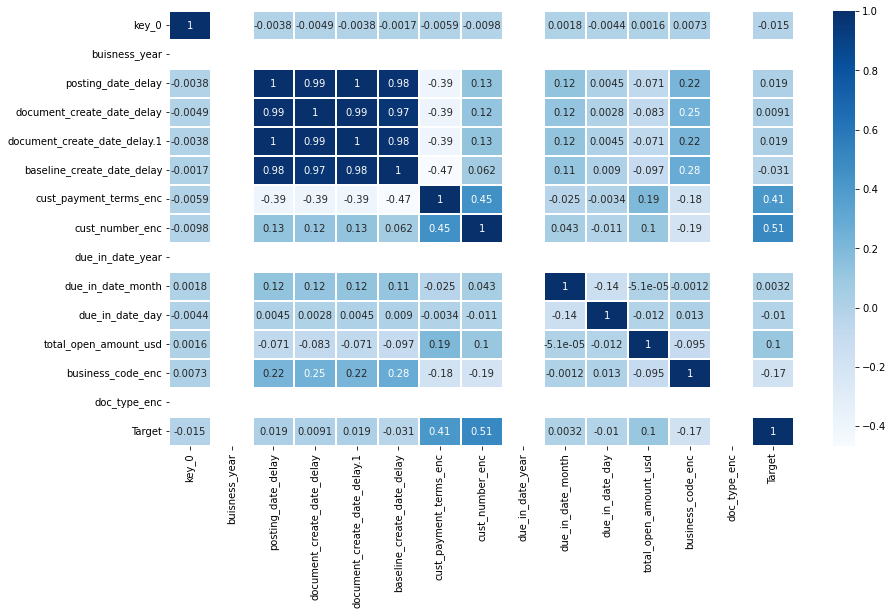

In [49]:
# Finding all correlations with help of heatmap 

corr=X_train.merge(y_train, on = X_train.index ).corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr,annot=True,linewidths=0.1,vmax=1.0, cmap=plt.cm.Blues)

In [50]:
correlated_features = set()
correlation_matrix = X_train.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.9: # corr% = 90%
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
clist = list(correlated_features)
clist

['document_create_date_delay.1',
 'baseline_create_date_delay',
 'document_create_date_delay']

In [51]:
# now we will drop highly coorelated data
X_train.drop(clist, axis =1,inplace=True)
X_test.drop(clist, axis =1,inplace=True)
X_val.drop(clist, axis =1,inplace=True)

In [52]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
X_train

,buisness_year,posting_date_delay,cust_payment_terms_enc,cust_number_enc,due_in_date_year,due_in_date_month,due_in_date_day,total_open_amount_usd,business_code_enc,doc_type_enc
20867,2019,15,-1.872720,-2.218694,2019,1,14,1568.64,1,0
46293,2019,15,1.342768,-6.855573,2019,1,14,13299.43,1,0
36314,2019,15,-1.872720,-2.218694,2019,1,14,27642.47,1,0
45042,2019,15,-1.872720,-2.218694,2019,1,14,45753.04,1,0
14546,2019,15,-1.872720,-2.218694,2019,1,14,7634.03,1,0
...,...,...,...,...,...,...,...,...,...,...
40162,2019,15,0.511322,-0.524470,2019,10,22,14522.31,1,0
42928,2019,15,1.342768,0.550000,2019,10,22,105166.27,1,0
25843,2019,17,-7.388787,-4.447368,2019,10,24,146.64,1,0
899,2019,15,1.342768,1.567308,2019,10,22,54043.04,1,0


In [53]:
sel.fit_transform(X_train)
sel.variances_

array([0.00000000e+00, 9.62426911e+01, 1.25678795e+01, 1.08292928e+01,
       0.00000000e+00, 7.12988815e+00, 7.50961151e+01, 1.42497917e+09,
       1.58782404e-01, 0.00000000e+00])

In [54]:
X_train.nunique()

buisness_year                 1
posting_date_delay           52
cust_payment_terms_enc       53
cust_number_enc             610
due_in_date_year              1
due_in_date_month            12
due_in_date_day              31
total_open_amount_usd     23049
business_code_enc             5
doc_type_enc                  1
dtype: int64

In [55]:
col = ['buisness_year']
X_train.drop(col,axis=1,inplace=True)
X_test.drop(col,axis=1,inplace=True)
X_val.drop(col,axis=1,inplace=True)

In [56]:
X_train

,posting_date_delay,cust_payment_terms_enc,cust_number_enc,due_in_date_year,due_in_date_month,due_in_date_day,total_open_amount_usd,business_code_enc,doc_type_enc
20867,15,-1.872720,-2.218694,2019,1,14,1568.64,1,0
46293,15,1.342768,-6.855573,2019,1,14,13299.43,1,0
36314,15,-1.872720,-2.218694,2019,1,14,27642.47,1,0
45042,15,-1.872720,-2.218694,2019,1,14,45753.04,1,0
14546,15,-1.872720,-2.218694,2019,1,14,7634.03,1,0
...,...,...,...,...,...,...,...,...,...
40162,15,0.511322,-0.524470,2019,10,22,14522.31,1,0
42928,15,1.342768,0.550000,2019,10,22,105166.27,1,0
25843,17,-7.388787,-4.447368,2019,10,24,146.64,1,0
899,15,1.342768,1.567308,2019,10,22,54043.04,1,0


In [57]:
# Train > val > test

# Prediction 

### linear regresion :

In [58]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
base_model = LinearRegression()
base_model.fit(X_train, y_train)

y_predict = base_model.predict(X_val)

# Finding mean sq err
mean_squared_error(y_val, y_predict, squared=False)

5.900096215778044

In [59]:
# Acuracy with LinearRegression
a = round(base_model.score(X_train,y_train)*100,2)
print(round(a,2),'%')

30.73 %


<AxesSubplot:xlabel='Predicted', ylabel='Actuals'>

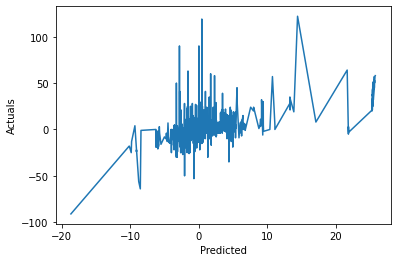

In [60]:
met = pd.DataFrame(zip(y_predict , y_val),columns=['Predicted','Actuals'])

# With LinearRegression prediction is nowere near 
sns.lineplot( x=met['Predicted'], y=met["Actuals"])


### Decision tree method :

In [61]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [62]:
y_predict2 = regressor.predict(X_val)
mean_squared_error(y_val, y_predict2, squared=False)

7.549720114648212

In [63]:
# Acuracy with DecisionTree
a = round(regressor.score(X_train,y_train)*100,2)
print(round(a,2),'%')

99.95 %


<AxesSubplot:xlabel='Predicted', ylabel='Actuals'>

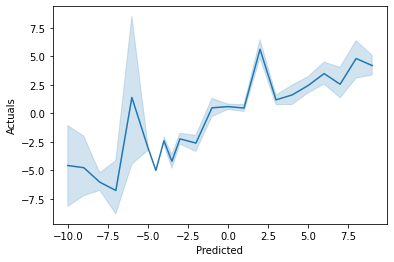

In [64]:
met = pd.DataFrame(zip(y_predict2 , y_val),columns=['Predicted','Actuals'])

# we will use graph to check how far are we off from our actual parameters
sns.lineplot( x=met['Predicted'], y=met["Actuals"])

#### We can see that prediction is not that far off except for few peaks thats due to new parametes that model haven't seen. 
#### With Decision tree method mean_squared_error is high but thats due to high peaks bt our prediction is more acurate with Decision tree.


In [65]:
# Col used
X_train.columns

Index(['posting_date_delay', 'cust_payment_terms_enc', 'cust_number_enc',
       'due_in_date_year', 'due_in_date_month', 'due_in_date_day',
       'total_open_amount_usd', 'business_code_enc', 'doc_type_enc'],
      dtype='object')

#  Now we will predict delay on test_set_df :-

In [66]:
a = adf

In [67]:
# Conversion of necessary data
a["baseline_create_date"] = a["baseline_create_date"].astype(int)
a["due_in_date"] = a["due_in_date"].astype(int)

# converting dates in date-time format 
a['due_in_date'] = pd.to_datetime(a['due_in_date'], format='%Y%m%d')
a['posting_date'] = pd.to_datetime(a['posting_date'])

# Creating necessary col
a['posting_date_delay'] = (a['due_in_date'] -  a['posting_date'])
# Converting posting_date_delay type
a['posting_date_delay'] = (a['posting_date_delay']).dt.days

# spliting due_in_date
a['due_in_date_year'] = a['due_in_date'].dt.year
a['due_in_date_month'] = a['due_in_date'].dt.month
a['due_in_date_day'] = a['due_in_date'].dt.day

# Encode our data 
a['cust_number_enc'] = cust_number_encoder.transform(a['cust_number'])
a['cust_payment_terms_enc'] = cust_payment_terms_encoder.transform(a['cust_payment_terms'])
a['business_code_enc'] = business_code_encoder.transform(a['business_code'])
a['doc_type_enc'] = document_type_encoder.transform(a['document type'])

# Convert curency 
a['total_open_amount_usd'] = np.where(a.invoice_currency == 'CAD', a.total_open_amount*0.81, a.total_open_amount)

In [68]:
# Now we will delete all unnecessary col's
col = ['business_code','cust_number','name_customer','clear_date','buisness_year',
       'doc_id','posting_date','document_create_date','document_create_date.1','due_in_date',
      'invoice_currency','document type','posting_id','area_business','total_open_amount','baseline_create_date',
      'cust_payment_terms','invoice_id','isOpen']
a = a.drop(col, axis = 1)

In [69]:
test_set_df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
6,CA02,0140105686,SYSC corp,NaN,2020.0,2.960618e+09,2020-03-01,20200301,20200301,20200320.0,CAD,RV,1.0,NaN,2337.30,20200310.0,CA10,2.960618e+09,1
10,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930796e+09,2020-04-17,20200416,20200417,20200502.0,USD,RV,1.0,NaN,18042.89,20200417.0,NAH4,1.930796e+09,1
26,U001,200769623,WAL-MAR in,NaN,2020.0,1.930759e+09,2020-04-09,20200407,20200409,20200424.0,USD,RV,1.0,NaN,16252.84,20200409.0,NAH4,1.930759e+09,1
31,U001,0200705089,JETR,NaN,2020.0,1.930593e+09,2020-03-03,20200303,20200303,20200318.0,USD,RV,1.0,NaN,15223.20,20200303.0,NAA8,1.930593e+09,1
39,U001,0200794332,COST trust,NaN,2020.0,1.930643e+09,2020-03-14,20200312,20200314,20200329.0,USD,RV,1.0,NaN,42289.19,20200314.0,NAAX,1.930643e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49961,U001,0200793830,M trust,NaN,2020.0,1.930820e+09,2020-04-23,20200423,20200423,20200508.0,USD,RV,1.0,NaN,16435.66,20200423.0,NAA8,1.930820e+09,1
49969,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930648e+09,2020-03-14,20200313,20200314,20200329.0,USD,RV,1.0,NaN,12.44,20200314.0,NAH4,1.930648e+09,1
49980,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930585e+09,2020-03-01,20200229,20200301,20200316.0,USD,RV,1.0,NaN,9267.03,20200301.0,NAH4,1.930585e+09,1
49987,U001,0200762301,C&S WH in,NaN,2020.0,1.930768e+09,2020-04-10,20200409,20200410,20200425.0,USD,RV,1.0,NaN,44195.22,20200410.0,NAC6,1.930768e+09,1


In [70]:
# Now we will predict the values 
final_result = regressor.predict(a)
final_result = pd.Series(final_result,name='Target')

# resetting the index of test set so that we can merge price series with it
test_set_df.reset_index(drop=True,inplace=True)

# Now we will merge it 
Final = pd.concat([test_set_df, final_result], axis=1)

# It's going to create a new col key_0 we will drop it 
# Final.drop(['key_0'], axis = 1, inplace=True)

Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,Target
0,CA02,0140105686,SYSC corp,NaN,2020.0,2.960618e+09,2020-03-01,20200301,20200301,20200320.0,CAD,RV,1.0,NaN,2337.30,20200310.0,CA10,2.960618e+09,1,-3.0
1,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930796e+09,2020-04-17,20200416,20200417,20200502.0,USD,RV,1.0,NaN,18042.89,20200417.0,NAH4,1.930796e+09,1,5.0
2,U001,200769623,WAL-MAR in,NaN,2020.0,1.930759e+09,2020-04-09,20200407,20200409,20200424.0,USD,RV,1.0,NaN,16252.84,20200409.0,NAH4,1.930759e+09,1,-5.0
3,U001,0200705089,JETR,NaN,2020.0,1.930593e+09,2020-03-03,20200303,20200303,20200318.0,USD,RV,1.0,NaN,15223.20,20200303.0,NAA8,1.930593e+09,1,-5.0
4,U001,0200794332,COST trust,NaN,2020.0,1.930643e+09,2020-03-14,20200312,20200314,20200329.0,USD,RV,1.0,NaN,42289.19,20200314.0,NAAX,1.930643e+09,1,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,U001,0200793830,M trust,NaN,2020.0,1.930820e+09,2020-04-23,20200423,20200423,20200508.0,USD,RV,1.0,NaN,16435.66,20200423.0,NAA8,1.930820e+09,1,5.0
9996,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930648e+09,2020-03-14,20200313,20200314,20200329.0,USD,RV,1.0,NaN,12.44,20200314.0,NAH4,1.930648e+09,1,-5.0
9997,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930585e+09,2020-03-01,20200229,20200301,20200316.0,USD,RV,1.0,NaN,9267.03,20200301.0,NAH4,1.930585e+09,1,-5.0
9998,U001,0200762301,C&S WH in,NaN,2020.0,1.930768e+09,2020-04-10,20200409,20200410,20200425.0,USD,RV,1.0,NaN,44195.22,20200410.0,NAC6,1.930768e+09,1,-5.0
